# Mini Tarefa - Aula 01 - 25/09/2023

Usando o mesmo dataset da aula (bank-full.csv), obtenha a acurácia de um modelo de regressão logística, com penalidade do tipo l2.

Utilize a técnica de SMOTEENN de Up + Downsampling. Envie o valor encontrado no forms (https://docs.google.com/forms/d/e/1FAIpQLScXmn6yWbbaROQtd2qhMH-iMrjq5E90h6Vh6-_1TBTW66lpbw/viewform).

## Pedro

In [45]:
# !pip install imblearn

In [46]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from imblearn.combine import SMOTEENN
from collections import Counter

In [47]:
df = pd.read_csv('datasets/bank-full.csv')

In [48]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [49]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [51]:
X = df.select_dtypes(include=np.number)
y = df['Target']

In [52]:
df['Target'].value_counts(normalize=True)

Target
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [53]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Com stratify força o y_test a manter a mesma proporção.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
model = LogisticRegression(penalty='l2', random_state=42)
model.fit(X_train, y_train)

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [55]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7985
         yes       0.54      0.14      0.22      1058

    accuracy                           0.89      9043
   macro avg       0.72      0.56      0.58      9043
weighted avg       0.85      0.89      0.85      9043



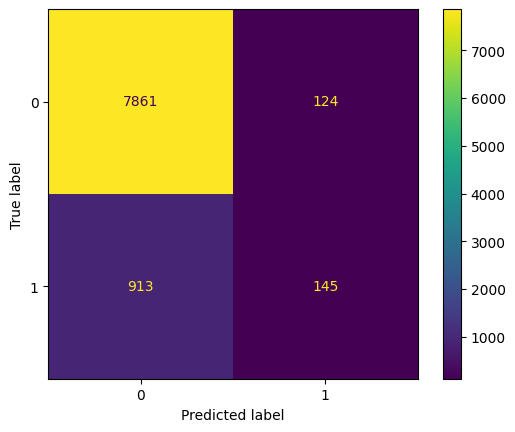

In [56]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [57]:
print("Shape do dataset original:", Counter(y_train))

smn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smn.fit_resample(X_train, y_train)
print("Shape do dataset após oversampling:", Counter(y_train_res))

Shape do dataset original: Counter({'no': 31937, 'yes': 4231})
Shape do dataset após oversampling: Counter({'yes': 27113, 'no': 22452})


In [58]:
model = LogisticRegression(penalty='l2', random_state=42)
model.fit(X_train_res, y_train_res)

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [59]:
y_pred = model.predict(X_test)

In [60]:
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.7151387813778614


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.96      0.71      0.81      7985
         yes       0.26      0.78      0.39      1058

    accuracy                           0.72      9043
   macro avg       0.61      0.74      0.60      9043
weighted avg       0.88      0.72      0.76      9043



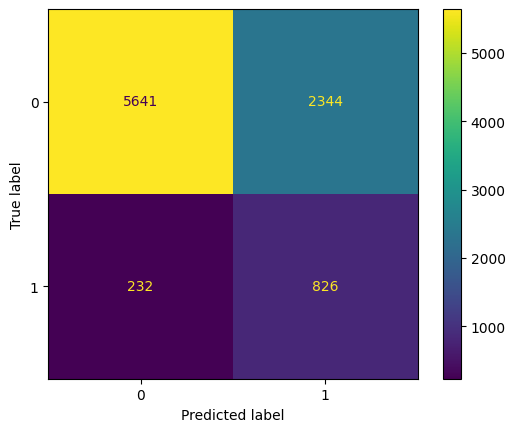

In [62]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## ChatGPT

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.combine import SMOTEENN

In [65]:
from pandas.io.pytables import DataCol
data =  pd.read_csv('datasets/bank-full.csv')

# Separar recursos (X) e rótulos (y)
X = data.drop(columns=['Target'])
y = data['Target']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir colunas categóricas e numéricas
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(exclude=['object']).columns

# Codificar as variáveis categóricas
label_encoder = LabelEncoder()
for column in categorical_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

# Pré-processamento de dados usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Criar um pipeline com pré-processamento e modelo de regressão logística
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l2', random_state=42))
])

# Aplicar SMOTEENN para balancear as classes
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

# Treinar o modelo no conjunto de dados balanceado
pipeline.fit(X_train_resampled, y_train_resampled)

# Prever rótulos no conjunto de teste
y_pred = pipeline.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo de regressão logística:", accuracy)

Acurácia do modelo de regressão logística: 0.8251686387260865
